# Recommendation Movie
![film](./film.jpg)
membuat model rekomendasi untuk memberikan saran kepada pengguna. dataset yang digunakan berasal dari kaggle, berikut adalah linknya:
https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset?select=filmtv_movies.csv

# Import Library

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Upload cvs

In [87]:
df = pd.read_csv('filmtv_movies.csv')

df.head(5)

filmtv_id                                        title  year      genre  \
0          2  Bugs Bunny's Third Movie: 1001 Rabbit Tales  1982  Animation   
1          3                    18 anni tra una settimana  1991      Drama   
2         17                             Ride a Wild Pony  1976   Romantic   
3         18                                        Diner  1982     Comedy   
4         20              A che servono questi quattrini?  1942     Comedy   

   duration        country                             directors  \
0        76  United States  David Detiege, Art Davis, Bill Perez   
1        98          Italy                         Luigi Perelli   
2        91  United States                           Don Chaffey   
3        95  United States                        Barry Levinson   
4        85          Italy                        Esodo Pratelli   

                                              actors  avg_vote  critics_vote  \
0                                                NaN       7.7          8.00   
1  Kim Rossi Stuart, Simona Cavallari, Ennio Fant...       6.5          6.00   
2  Michael Craig, John Meillon, Eva Griffith, Gra...       5.7          6.00   
3  Mickey Rourke, Steve Guttenberg, Ellen Barkin,...       7.0          8.00   
4  Eduardo De Filippo, Peppino De Filippo, Clelia...       5.9          5.33   

   public_vote  total_votes  \
0          7.0           22   
1          7.0            4   
2          5.0           10   
3          6.0           18   
4          7.0           15   

                                         description  \
0  With two protruding front teeth, a slightly sl...   
1  Samantha, not yet eighteen, leaves the comfort...   
2  In the Australia of the pioneers, a boy and a ...   
3  Five boys from Baltimore have a habit of meeti...   
4  With a stratagem, the penniless and somewhat p...   

                                               notes  humor  rhythm  effort  \
0  These are many small independent stories, whic...      3       3       0   
1  Luigi Perelli, the director of the "Piovra", o...      0       2       0   
2  "Ecological" story with a happy ending, not wi...      1       2       1   
3  A cast of will be famous for Levinson's direct...      2       2       0   
4  Taken from the play by Armando Curcio that the...      3       1       1   

   tension  erotism  
0        0        0  
1        2        0  
2        0        0  
3        1        2  
4        0        0

In [88]:
# cek baris dan kolom
df.shape

(41399, 19)

In [89]:
#cek info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41399 entries, 0 to 41398
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     41399 non-null  int64  
 1   title         41399 non-null  object 
 2   year          41399 non-null  int64  
 3   genre         41304 non-null  object 
 4   duration      41399 non-null  int64  
 5   country       41389 non-null  object 
 6   directors     41365 non-null  object 
 7   actors        39272 non-null  object 
 8   avg_vote      41399 non-null  float64
 9   critics_vote  36703 non-null  float64
 10  public_vote   41205 non-null  float64
 11  total_votes   41399 non-null  int64  
 12  description   39857 non-null  object 
 13  notes         18797 non-null  object 
 14  humor         41399 non-null  int64  
 15  rhythm        41399 non-null  int64  
 16  effort        41399 non-null  int64  
 17  tension       41399 non-null  int64  
 18  erotism       41399 non-nu

terdapat 19 kolom dengan detail informasi :
1. 9 kolom dengan tipe data int64, kolom tersebut adalah:
    - `filmtv_id`: key feature dari film tv yang diambil dari website
    - `year`: tahun muncul film
    - `duration`: lama waktu durasi film dalam menit
    - `total_votes`: jumlah vote dari critics dan public
    - `humor`: skor untuk movie humor dari filmtv
    - `rhythm`: skor untuk ritme movie dari filmtv
    - `effort`: skor untuk effort movie dari filmtv
    - `tension`: skor untuk tensi movie dari filmtv
    - `erotism`: skor untuk nilai erotis dalam movie dari filmtv
2. 7 kolom dengan tipe data object, kolom tersebut adalah:
    - `title`: judul original untuk movie
    - `genre`: genre dari movie
    - `country`: negara tempat memproduksi movie
    - `directors`: nama dari direktor movie tersebut
    - `actors`: nama dari aktor movie
    - `description`: deskripsi dari movie
    - `notes`: info tambahan unutk movie
3. 3 kolom dengan tipe data float64, kolom tersebut adalah:
    - `avg_vote`: nilai rata-rata rating dari critics dan public
    - `critics_vote`: nilai rata-rata dari critics
    - `public_vote`: nilai rata-rata vote dari public

# Exploratory Data Analysis
Pengambilan beberapa feature. kita akan mengambil beberapa feature saja untuk membangun model sistem rekomendasi. feature yang akan kita gunakan adalah `title`, `avg_vote`, `filmtv_id`, `genre`, dan, `directors`. feature tersebut digunakan untuk membangun model *content based filtering* dan *collaborative filtering*. untuk detail informasi adalah:
1. *Content based filtering* menggunakna feature:
    - title
    - genres
2. *Collaborative filtering* menggunakan feature:
    - title
    - avg_vote

visualisasi dari avg_vote

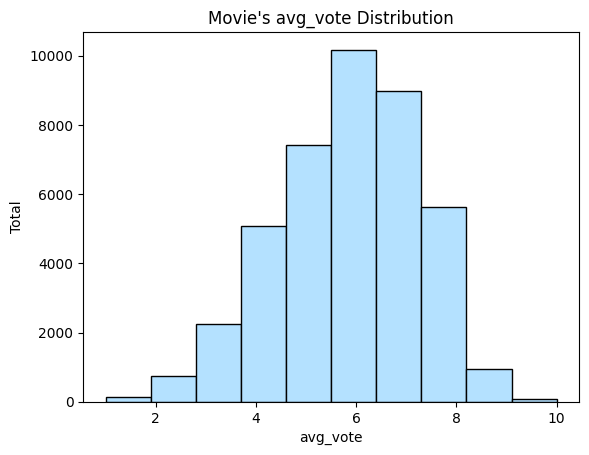

In [90]:
plt.hist(df.avg_vote, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('avg_vote')
plt.title("Movie's avg_vote Distribution")
plt.show()

mengecek banyak film dalam genre

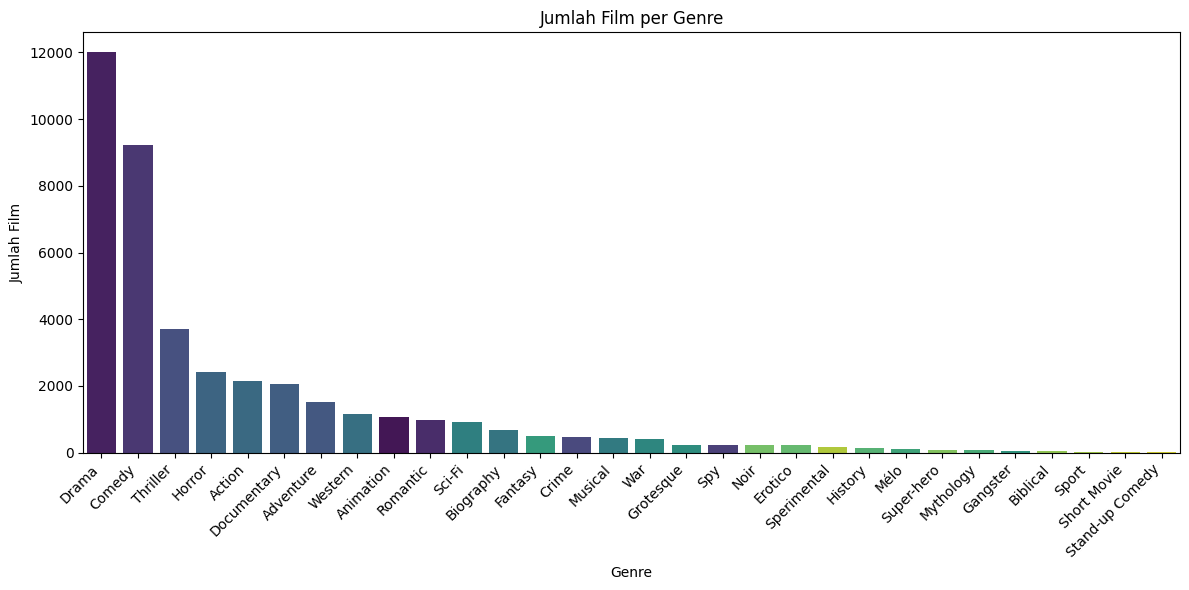

In [91]:
# Visualisasi jumlah film pada setiap genre
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', hue='genre', order=df['genre'].value_counts().index, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.tight_layout()
plt.show()

mengecek informasi detail tiap feature

In [92]:
df.describe().T

count          mean           std     min       25%      50%  \
filmtv_id     41399.0  57746.410179  59962.095730     2.0  15857.00  36266.0   
year          41399.0   1993.505302     23.685612  1897.0   1976.00   2001.0   
duration      41399.0    100.537163     27.260962    41.0     90.00     96.0   
avg_vote      41399.0      5.801522      1.403861     1.0      4.80      5.9   
critics_vote  36703.0      5.796077      1.593062     1.0      4.67      6.0   
public_vote   41205.0      5.924135      1.480112     1.0      5.00      6.0   
total_votes   41399.0     36.986763     69.386853     1.0      5.00     12.0   
humor         41399.0      0.577381      0.899402     0.0      0.00      0.0   
rhythm        41399.0      1.345347      1.154829     0.0      0.00      2.0   
effort        41399.0      0.684847      1.112334     0.0      0.00      0.0   
tension       41399.0      0.919153      1.095410     0.0      0.00      0.0   
erotism       41399.0      0.309814      0.645930     0.0      0.00      0.0   

                  75%       max  
filmtv_id     70935.0  232920.0  
year           2013.0    2023.0  
duration        107.0    1525.0  
avg_vote          6.9      10.0  
critics_vote      7.0      10.0  
public_vote       7.0      10.0  
total_votes      36.0    1082.0  
humor             1.0       5.0  
rhythm            2.0       5.0  
effort            1.0       5.0  
tension           2.0       5.0  
erotism           0.0       5.0

Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

pengecekan jumlah nilai duplikat

In [93]:
df.duplicated().sum()

np.int64(0)

tidak ada data yang duplikat

selanjutnya, mengecek apakah ada data kosong

In [94]:
df.isnull().sum()

filmtv_id           0
title               0
year                0
genre              95
duration            0
country            10
directors          34
actors           2127
avg_vote            0
critics_vote     4696
public_vote       194
total_votes         0
description      1542
notes           22602
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64

ternyata terdapat banyak nilai null pada dataframe

# Data Preprocessing

mengambil feature yang digunakan saja

In [95]:
# mengambil beberapa feature saja
df_set = df[['title', 'avg_vote', 'filmtv_id', 'genre', 'directors','description']].copy()

mengecek feature apa yang kosong

In [96]:
df_set.isnull().sum()

title             0
avg_vote          0
filmtv_id         0
genre            95
directors        34
description    1542
dtype: int64

menghapus nilai yang hilang

In [97]:
df_set.dropna(inplace=True)
print(df_set.shape)

(39742, 6)


mengecek ulang data

In [98]:
df_set.isnull().sum()

title          0
avg_vote       0
filmtv_id      0
genre          0
directors      0
description    0
dtype: int64

mengecek informasi dari genre

In [99]:
df_set.genre.unique()

array(['Animation', 'Drama', 'Romantic', 'Comedy', 'Spy', 'Crime',
       'Thriller', 'Adventure', 'Documentary', 'Horror', 'Action',
       'Western', 'Biography', 'Musical', 'Sci-Fi', 'War', 'Grotesque',
       'Gangster', 'Fantasy', 'Mélo', 'Mythology', 'History', 'Erotico',
       'Noir', 'Super-hero', 'Biblical', 'Sport', 'Sperimental',
       'Short Movie', 'Stand-up Comedy'], dtype=object)

mengecek informasi dari directors

In [100]:
df_set.directors.unique().tolist()[:10]

['David Detiege, Art Davis, Bill Perez',
 'Luigi Perelli',
 'Don Chaffey',
 'Barry Levinson',
 'Esodo Pratelli',
 'Gianfranco Baldanello, Menahem Golan',
 'Elio Petri',
 'John Frankenheimer',
 'Ray Morrison (Angelo Dorigo)',
 'James Foley']

pada beberapa baris terdapat nilai double pada directors

In [101]:
# Menghitung jumlah baris dengan lebih dari satu director (ditandai dengan koma)
multi_director_count = df_set['directors'].str.contains(',', na=False).sum()
print(f"Jumlah baris dengan lebih dari satu director: {multi_director_count}")

Jumlah baris dengan lebih dari satu director: 2111


In [102]:
# Menghapus baris dengan lebih dari satu director (ada koma di kolom 'directors')
df_set = df_set[~df_set['directors'].str.contains(',', na=False)]
print(df_set.shape)

(37631, 6)


In [103]:
# df_set.head(5000)

In [104]:
print(df_set.shape)

(37631, 6)


mengambil feature yang digunakna untuk membuat model content based filtering

In [105]:
df_cbf = pd.DataFrame({
    'filmtv_id': df_set['filmtv_id'],
    'title': df_set['title'],
    'genre': df_set['genre'],
    'description': df_set['description'].apply(lambda x: x.lower().strip())
})
df_cbf.head(5)

filmtv_id                            title     genre  \
1          3        18 anni tra una settimana     Drama   
2         17                 Ride a Wild Pony  Romantic   
3         18                            Diner    Comedy   
4         20  A che servono questi quattrini?    Comedy   
6         22                A ciascuno il suo     Drama   

                                         description  
1  samantha, not yet eighteen, leaves the comfort...  
2  in the australia of the pioneers, a boy and a ...  
3  five boys from baltimore have a habit of meeti...  
4  with a stratagem, the penniless and somewhat p...  
6  investigations into two murders committed in a...

# Model Development dengan Content Based Filtering

menggunakan TF-IDF Vectorizer menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [106]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(df_cbf['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'biblical', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'erotico', 'fantasy',
       'fi', 'gangster', 'grotesque', 'hero', 'history', 'horror',
       'movie', 'musical', 'mythology', 'mélo', 'noir', 'romantic', 'sci',
       'short', 'sperimental', 'sport', 'spy', 'stand', 'super',
       'thriller', 'up', 'war', 'western'], dtype=object)

lakukan fit dan transformasi ke dalam bentuk matriks.

In [107]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_cbf['genre'])
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(37631, 34)

matriks yang kita miliki berukuran (95, 22). Nilai 95 merupakan ukuran data dan 22 merupakan matrik kategori masakan. 

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense().

In [108]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

lihat matriks tf-idf untuk beberapa resto (resto_name) dan kategori masakan (cuisine).

In [109]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=df_cbf.title
).sample(28, axis=1).sample(10, axis=0)

movie  hero  documentary  \
title                                                                         
Il testimone invisibile                              0.0   0.0          0.0   
Tommaso                                              0.0   0.0          0.0   
10.5: Apocalypse                                     0.0   0.0          0.0   
The Last Of The Mohicans                             0.0   0.0          0.0   
The Last Boyscout                                    0.0   0.0          0.0   
Forza Italia!                                        0.0   0.0          1.0   
Dread                                                0.0   0.0          0.0   
Kampf um Rom I                                       0.0   0.0          0.0   
Zashchitniki                                         0.0   0.0          0.0   
Friday the 13th, Part VIII: Jason Takes Manhattan    0.0   0.0          0.0   

                                                   sci  super  fantasy  stand  \
title                                                                           
Il testimone invisibile                            0.0    0.0      0.0    0.0   
Tommaso                                            0.0    0.0      0.0    0.0   
10.5: Apocalypse                                   0.0    0.0      0.0    0.0   
The Last Of The Mohicans                           0.0    0.0      0.0    0.0   
The Last Boyscout                                  0.0    0.0      0.0    0.0   
Forza Italia!                                      0.0    0.0      0.0    0.0   
Dread                                              0.0    0.0      0.0    0.0   
Kampf um Rom I                                     0.0    0.0      0.0    0.0   
Zashchitniki                                       0.0    0.0      0.0    0.0   
Friday the 13th, Part VIII: Jason Takes Manhattan  0.0    0.0      0.0    0.0   

                                                   sport  western  thriller  \
title                                                                         
Il testimone invisibile                              0.0      0.0       1.0   
Tommaso                                              0.0      0.0       0.0   
10.5: Apocalypse                                     0.0      0.0       0.0   
The Last Of The Mohicans                             0.0      1.0       0.0   
The Last Boyscout                                    0.0      0.0       0.0   
Forza Italia!                                        0.0      0.0       0.0   
Dread                                                0.0      0.0       0.0   
Kampf um Rom I                                       0.0      0.0       0.0   
Zashchitniki                                         0.0      0.0       0.0   
Friday the 13th, Part VIII: Jason Takes Manhattan    0.0      0.0       0.0   

                                                   ...   fi  adventure  spy  \
title                                              ...                        
Il testimone invisibile                            ...  0.0        0.0  0.0   
Tommaso                                            ...  0.0        0.0  0.0   
10.5: Apocalypse                                   ...  0.0        0.0  0.0   
The Last Of The Mohicans                           ...  0.0        0.0  0.0   
The Last Boyscout                                  ...  0.0        0.0  0.0   
Forza Italia!                                      ...  0.0        0.0  0.0   
Dread                                              ...  0.0        0.0  0.0   
Kampf um Rom I                                     ...  0.0        1.0  0.0   
Zashchitniki                                       ...  0.0        0.0  0.0   
Friday the 13th, Part VIII: Jason Takes Manhattan  ...  0.0        0.0  0.0   

                                                   short  comedy  grotesque  \
title                                                                         
Il testimone invisibile                              0.0     0.0        0

lakukan fit dan transformasi ke dalam bentuk matriks.

In [110]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [111]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_cbf['title'], columns=df_cbf['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (37631, 37631)


title                              The Men Who Stare at Goats   Bingo  \
title                                                                   
Honest Thief                                               0.0    0.0   
The Miracle of Our Lady of Fatima                          0.0    0.0   
The Long Day's Dying                                       0.0    0.0   
Den blomstertid nu kommer                                  0.0    0.0   
Shine                                                      0.0    0.0   
Kiss or Kill                                               0.0    0.0   
Animali nella grande guerra                                0.0    0.0   
Romance at Reindeer Lodge                                  0.0    0.0   
Target Earth                                               0.0    0.0   
Gone                                                       0.0    0.0   

title                              Lo sceriffo che non spara  \
title                                                          
Honest Thief                                             0.0   
The Miracle of Our Lady of Fatima                        0.0   
The Long Day's Dying                                     0.0   
Den blomstertid nu kommer                                0.0   
Shine                                                    0.0   
Kiss or Kill                                             0.0   
Animali nella grande guerra                              0.0   
Romance at Reindeer Lodge                                0.0   
Target Earth                                             0.0   
Gone                                                     0.0   

title                              W jak morderstwo  \
title                                                 
Honest Thief                                    0.0   
The Miracle of Our Lady of Fatima               0.0   
The Long Day's Dying                            0.0   
Den blomstertid nu kommer                       1.0   
Shine                                           0.0   
Kiss or Kill                                    0.0   
Animali nella grande guerra                     0.0   
Romance at Reindeer Lodge                       0.0   
Target Earth                                    0.0   
Gone                                            1.0   

title                              Abbott & Costello Meet Frankenstein  
title                                                                   
Honest Thief                                                       0.0  
The Miracle of Our Lady of Fatima                                  0.0  
The Long Day's Dying                                               0.0  
Den blomstertid nu kommer                                          0.0  
Shine                                                              0.0  
Kiss or Kill                                                       0.0  
Animali nella grande guerra                                        0.0  
Romance at Reindeer Lodge                                          0.0  
Target Earth                                                       0.0  
Gone                                                               0.0

In [112]:
def title_recommendations(title, similarity_data=cosine_sim_df, items=df_cbf[['title', 'genre','description']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [113]:
df_cbf[df_cbf.title.eq('The Adventures of Don Juan')]

filmtv_id                       title      genre  \
470        735  The Adventures of Don Juan  Adventure   

                                           description  
470  "don giovanni, a spanish gentleman, must leave...

In [114]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
title_recommendations('The Adventures of Don Juan')

title      genre  \
0                   The Amazons  Adventure   
1           Clash of the Titans  Adventure   
2              A Dog's Way Home  Adventure   
3                    I Normanni  Adventure   
4  The Black Shield of Falworth  Adventure   

                                         description  
0  antiope, by eliminating one by one all the can...  
1  perseus was born from one of the many terrestr...  
2  a dog embarks on a solo journey of more than 4...  
3  during the ninth century, some norman tribes d...  
4  having escaped the extermination of the noble ...

Model COntent Based Filtering dapat merekomendasikan top 5 movie yang mirip dengan Pay or Die

# Model Development dengan Collaborative Filtering

pahami terlebih dahulu data rating yang kita miliki. Ingatlah saat Anda melakukan load data di awal dan membaca file rating_final.csv. Saat itu, Anda membuat variabel rating dan menetapkan data pada variabel tersebut.

Anda perlu melakukan persiapan data untuk menyandikan (encode) fitur ‘user’ dan ‘placeID’ ke dalam indeks integer.

## Include Library

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [116]:
# copy dataframe untuk cross validation
df_cv = df_set.copy()

persiapan untuk menyandikan dalam indeks integer

In [117]:
# Mengubah filmtv_id menjadi list tanpa nilai yang sama

filmtv_ids = df_cv['filmtv_id'].unique().tolist()
print('list filmtv_id: ', filmtv_ids)
 
# Melakukan encoding filmtv_id
filmtv_to_filmtv_encoded = {x: i for i, x in enumerate(filmtv_ids)}
print('encoded filmtv_id : ', filmtv_to_filmtv_encoded)
 
# Melakukan proses encoding angka ke ke filmtv_id
filmtv_encoded_to_filmtv = {i: x for i, x in enumerate(filmtv_ids)}
print('encoded angka ke filmtv_id: ', filmtv_encoded_to_filmtv)

list filmtv_id:  [3, 17, 18, 20, 22, 23, 24, 26, 30, 32, 34, 36, 37, 38, 45, 47, 49, 51, 53, 54, 55, 58, 59, 61, 63, 67, 68, 69, 70, 71, 73, 74, 77, 78, 79, 80, 83, 84, 87, 88, 89, 92, 94, 95, 97, 100, 101, 104, 105, 107, 108, 109, 110, 111, 114, 115, 117, 118, 119, 121, 122, 123, 124, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 138, 140, 142, 143, 145, 146, 150, 151, 153, 154, 155, 158, 159, 162, 164, 165, 167, 168, 169, 173, 174, 176, 177, 178, 180, 181, 182, 183, 186, 188, 189, 193, 194, 198, 199, 200, 201, 202, 204, 205, 207, 208, 209, 210, 213, 214, 216, 217, 219, 220, 221, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 254, 255, 256, 257, 258, 260, 262, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 276, 278, 282, 285, 287, 288, 289, 290, 291, 292, 293, 296, 297, 298, 299, 300, 301, 302, 303, 305, 307, 308, 309, 310, 311, 312, 314, 316, 317, 318, 320, 322, 325, 327, 330, 331, 332, 334, 337, 338, 339

lakukan juga untuk title

In [118]:
# Mengubah title menjadi list tanpa nilai yang sama
title_ids = df_cv['title'].unique().tolist()
print('list title: ', title_ids)
 
# Melakukan encoding title
title_to_title_encoded = {x: i for i, x in enumerate(title_ids)}
print('encoded title : ', title_to_title_encoded)
 
# Melakukan proses encoding angka ke ke title
title_encoded_to_title = {i: x for i, x in enumerate(title_ids)}
print('encoded angka ke title: ', title_encoded_to_title)

list title:  ['18 anni tra una settimana', 'Ride a Wild Pony', 'Diner', 'A che servono questi quattrini?', 'A ciascuno il suo', 'Dead-Bang', 'A... come assassino', 'At Close Range', 'A Ghentar si muore facile', 'Sleeping with the Enemy', 'In Bed With Madonna', 'Bowery at Midnight', 'A mezzanotte va la ronda del piacere', 'Mr. Majestyk', 'Warning Sign', 'About Last Night', 'Fail-Safe', 'Some Like It Hot', 'A qualsiasi prezzo', "Johnny O'Clock", 'Back to School', 'Driving Miss Daisy', 'Enid Is Sleeping', 'The Appaloosa', '...a tutte le auto della polizia...', "You'll Like My Mother", 'Abbasso la miseria!', 'Abbasso la ricchezza!', 'Can You Feel Me Dancing?', 'Charlie Muffin', 'Abbronzatissimi', 'The Deep', 'Abe Lincoln in Illinois', 'Absolute Beginners', 'The Abyss', 'Acapulco, prima spiaggia... a sinistra', 'Accadde al penitenziario', 'It Happened Tomorrow', 'Made in Heaven', 'September Affair', 'It Happened One Night', 'Accattone', 'Arrêt sur image', 'Achtung! Banditi!', 'Water', 'Acqu

mengecek isi dari df_cv

In [119]:
df_cv.head(5)

title  avg_vote  filmtv_id     genre  \
1        18 anni tra una settimana       6.5          3     Drama   
2                 Ride a Wild Pony       5.7         17  Romantic   
3                            Diner       7.0         18    Comedy   
4  A che servono questi quattrini?       5.9         20    Comedy   
6                A ciascuno il suo       7.6         22     Drama   

        directors                                        description  
1   Luigi Perelli  Samantha, not yet eighteen, leaves the comfort...  
2     Don Chaffey  In the Australia of the pioneers, a boy and a ...  
3  Barry Levinson  Five boys from Baltimore have a habit of meeti...  
4  Esodo Pratelli  With a stratagem, the penniless and somewhat p...  
6      Elio Petri  Investigations into two murders committed in a...

petakan filmtv_id dan title ke dataframe yang berkaitan

In [120]:
# Mapping filmtv_id ke dataframe user
df_cv['filmtv_id'] = df_cv['filmtv_id'].map(filmtv_to_filmtv_encoded)
 
# Mapping title ke dataframe resto
df_cv['title'] = df_cv['title'].map(title_to_title_encoded)

acak datanya terlebih dahulu agar distribusinya menjadi random

In [121]:
# Mengacak dataset
df_cv = df_cv.sample(frac=1, random_state=42)
df_cv.head(5)

title  avg_vote  filmtv_id    genre         directors  \
37671  32837       7.4      34183  Musical      Bruno Dumont   
20654  17959       7.3      18487  Western    William Witney   
19051   3200       7.3      17590   Comedy  Edouard Molinaro   
923      894       6.2        896    Drama      Paul Czinner   
30355  26491       3.0      27417    Drama   Stéphane Giusti   

                                             description  
37671  Year 1429. The Hundred Years War rages. Jeanne...  
20654  Arizona, 1879. The young cavalry officer Jeff ...  
19051  An entrepreneur gets into trouble when the ass...  
923    The marriage between the German princess Cathe...  
30355  Ten years have passed since the end of the Tro...

mengecek informasi data jumlah, nilai min, dan nilai max

In [122]:
# medapatkan jumlah filmtv_id
jumlah_filmtv = len(filmtv_to_filmtv_encoded)
print('Jumlah filmtv_id: ', jumlah_filmtv)

# mendapatkan jumlah title
jumlah_title = len(title_to_title_encoded)
print('Jumlah title: ', jumlah_title)

# nilai minimum vote
min_vote = df_cv['avg_vote'].min()

# nilai maksimum vote
max_vote = df_cv['avg_vote'].max()

print('banyak filmtv_id: {}, banyak title: {}, nilai minimum vote: {}, nilai maksimum vote: {}'.format(
      jumlah_filmtv, jumlah_title, min_vote, max_vote
))

Jumlah filmtv_id:  37631
Jumlah title:  36052
banyak filmtv_id: 37631, banyak title: 36052, nilai minimum vote: 1.0, nilai maksimum vote: 10.0


bagi data train dan validasi dengan komposisi 90:10. Namun sebelumnya, kita perlu memetakan (mapping) menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [123]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df_cv[['filmtv_id', 'title']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df_cv['avg_vote'].apply(lambda x: (x - min_vote) / (max_vote - min_vote)).values
 
# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[34183 32837]
 [18487 17959]
 [17590  3200]
 ...
 [11284 11083]
 [  860   858]
 [15795 15412]] [0.71111111 0.7        0.7        ... 0.66666667 0.56666667 0.83333333]


In [124]:
class RecommenderNet(tf.keras.Model):
  
 # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [125]:
model = RecommenderNet(jumlah_filmtv, jumlah_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [131]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 300,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.6401 - root_mean_squared_error: 0.0093 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.6411 - root_mean_squared_error: 0.0083 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.6408 - root_mean_squared_error: 0.0085 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.6412 - root_mean_squared_error: 0.0080 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.6408 - root_mean_squared_error: 0.0077 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.6412 - root_mean_squared_error: 0.0077 - val_loss: 0.6926 - val_root_mean_squared_error: 0.1599
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38m

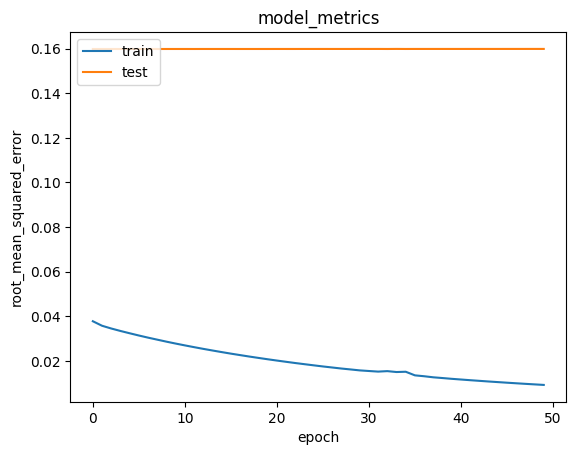

In [130]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()